In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('logistic.csv')

In [3]:
data.head(3)

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [4]:
data.drop(columns='Gender',inplace=True)

In [5]:
data.head(3)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [6]:
data.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

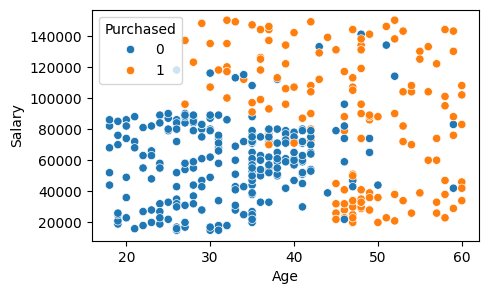

In [7]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Age',y='Salary',data=data,hue='Purchased')
plt.show()

In [8]:
x=data.iloc[:,:-1]

In [9]:
y=data['Purchased'] # .value_counts() commit why because if did'nt commit, trouble to handle balance bias data

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [13]:
x

,Age,Salary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [42]:
rus=RandomUnderSampler()
us_x,us_y=rus.fit_resample(x,y)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [44]:
us_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(us_x,us_y,test_size=0.2,random_state=42)

In [46]:
len(x_train)

228

In [47]:
len(x_test)

58

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
knn.score(x_test,y_test)*100 , knn.score(x_train,y_train)*100

(82.75862068965517, 95.6140350877193)

In [63]:
knn.predict([[-1.781797	,-1.490046]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [60]:
for i in range(1,11):
     knn1=KNeighborsClassifier(n_neighbors=i)
     knn1.fit(x_train,y_train)
     print(knn1.score(x_test,y_test)*100, knn1.score(x_train,y_train)*100, i)

74.13793103448276 99.56140350877193 1
74.13793103448276 94.73684210526315 2
81.03448275862068 96.05263157894737 3
81.03448275862068 95.17543859649122 4
82.75862068965517 95.6140350877193 5
82.75862068965517 94.2982456140351 6
84.48275862068965 94.73684210526315 7
79.3103448275862 94.2982456140351 8
81.03448275862068 94.2982456140351 9
81.03448275862068 94.73684210526315 10


In [27]:
from mlxtend.plotting import plot_decision_regions

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


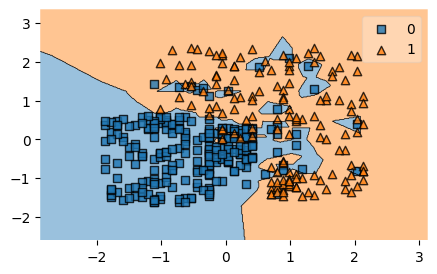

In [28]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy() , y.to_numpy(),clf=knn)
plt.show()